# Version

In [1]:
i = 3

# Import python dataset

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

# Load Data

In [3]:
# Preprocessing

scenario= "sinus" #sinus, helix
#n_instance = 1000
n_instance = 1000
n_features = 2
Z = 6
nodes = 8 #4
var = 4
use_bias = 'True'
scales = ['-1-1','0-1']
scaled = '-1-1'

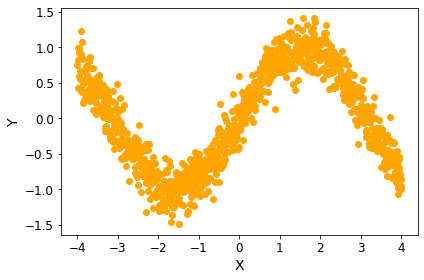

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [6]:
encoder=network.build_encoder(Z, nodes, n_features)
decoder=network.build_decoder(Z, var, n_features)
discriminator=network.build_discriminator(Z, nodes)
discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          512         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256)          1024        dense[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 256)          0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Preprocessing

In [7]:
import AAE_Model

GANorWGAN='GAN' #GAN
epochs = 200 #2000
batch_size = 100

In [8]:
aae = AAE_Model.AAE(i, Z, n_features, batch_size, GANorWGAN, nodes, var, use_bias)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 256)          512         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 256)          1024        dense_11[0][0]                   
__________________________________________________________________________________________________
re_lu_9 (ReLU)                  (None, 256)          0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [9]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


### latent variable

## Training

In [10]:
hist = aae.train(i, Z, batch_size, train_dataset, epochs, scaler, X_train_scaled, scaled, X_train, y_train )


1 [D real: 1.481335, D fake: 0.392811], [Enc/Dec loss: 0.516623, Enc/Dis: 0.510134]
2 [D real: 1.396578, D fake: 0.386580], [Enc/Dec loss: 0.358259, Enc/Dis: 0.351778]
3 [D real: 1.322834, D fake: 0.406181], [Enc/Dec loss: 0.285590, Enc/Dis: 0.278871]
4 [D real: 1.271085, D fake: 0.425447], [Enc/Dec loss: 0.239445, Enc/Dis: 0.232564]
5 [D real: 1.214581, D fake: 0.447094], [Enc/Dec loss: 0.221644, Enc/Dis: 0.214720]
6 [D real: 1.164140, D fake: 0.468318], [Enc/Dec loss: 0.209166, Enc/Dis: 0.202202]
7 [D real: 1.126998, D fake: 0.486968], [Enc/Dec loss: 0.193526, Enc/Dis: 0.186533]
8 [D real: 1.089544, D fake: 0.513058], [Enc/Dec loss: 0.186674, Enc/Dis: 0.179727]
9 [D real: 1.056168, D fake: 0.529109], [Enc/Dec loss: 0.188949, Enc/Dis: 0.182036]
10 [D real: 1.026040, D fake: 0.545921], [Enc/Dec loss: 0.170803, Enc/Dis: 0.163945]
11 [D real: 0.736798, D fake: 0.711855], [Enc/Dec loss: 0.160768, Enc/Dis: 0.153939]
12 [D real: 0.721353, D fake: 0.722088], [Enc/Dec loss: 0.153380, Enc/Dis:

96 [D real: 0.701587, D fake: 0.695530], [Enc/Dec loss: 0.083732, Enc/Dis: 0.073452]
97 [D real: 0.697591, D fake: 0.695602], [Enc/Dec loss: 0.078384, Enc/Dis: 0.066855]
98 [D real: 0.695504, D fake: 0.692175], [Enc/Dec loss: 0.082025, Enc/Dis: 0.072600]
99 [D real: 0.696823, D fake: 0.692701], [Enc/Dec loss: 0.075368, Enc/Dis: 0.066544]
100 [D real: 0.697306, D fake: 0.693765], [Enc/Dec loss: 0.084967, Enc/Dis: 0.074483]
101 [D real: 0.685150, D fake: 0.722474], [Enc/Dec loss: 0.081313, Enc/Dis: 0.071669]
102 [D real: 0.689801, D fake: 0.722409], [Enc/Dec loss: 0.079184, Enc/Dis: 0.069602]
103 [D real: 0.680308, D fake: 0.706965], [Enc/Dec loss: 0.074372, Enc/Dis: 0.069552]
104 [D real: 0.677544, D fake: 0.700028], [Enc/Dec loss: 0.080150, Enc/Dis: 0.073929]
105 [D real: 0.675650, D fake: 0.700521], [Enc/Dec loss: 0.074518, Enc/Dis: 0.067224]
106 [D real: 0.677311, D fake: 0.698076], [Enc/Dec loss: 0.079558, Enc/Dis: 0.069302]
107 [D real: 0.675377, D fake: 0.694516], [Enc/Dec loss: 0

192 [D real: 0.665525, D fake: 0.671352], [Enc/Dec loss: 0.083551, Enc/Dis: 0.074503]
193 [D real: 0.674260, D fake: 0.668032], [Enc/Dec loss: 0.075156, Enc/Dis: 0.067929]
194 [D real: 0.679953, D fake: 0.659711], [Enc/Dec loss: 0.074835, Enc/Dis: 0.069319]
195 [D real: 0.680080, D fake: 0.669421], [Enc/Dec loss: 0.065835, Enc/Dis: 0.060458]
196 [D real: 0.685949, D fake: 0.668491], [Enc/Dec loss: 0.073673, Enc/Dis: 0.068358]
197 [D real: 0.689798, D fake: 0.673282], [Enc/Dec loss: 0.070226, Enc/Dis: 0.065450]
198 [D real: 0.692133, D fake: 0.671517], [Enc/Dec loss: 0.073760, Enc/Dis: 0.068139]
199 [D real: 0.690322, D fake: 0.676227], [Enc/Dec loss: 0.081762, Enc/Dis: 0.065894]
200 [D real: 0.684033, D fake: 0.677923], [Enc/Dec loss: 0.077265, Enc/Dis: 0.067102]


### Plot Loss

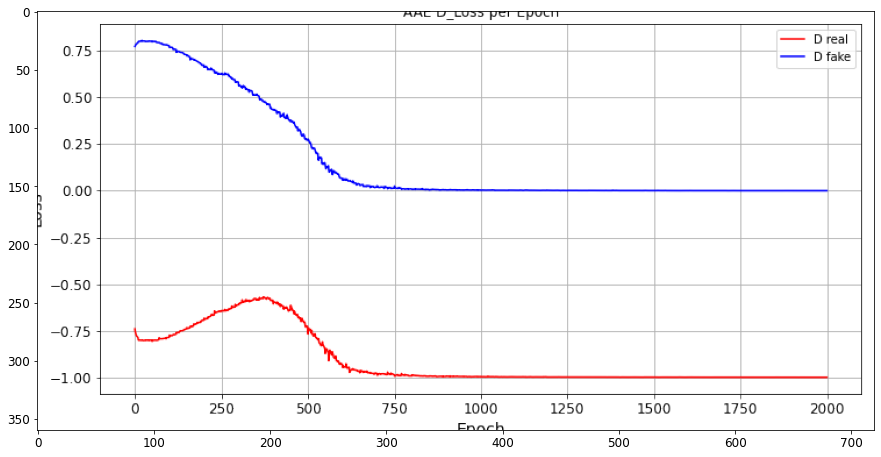

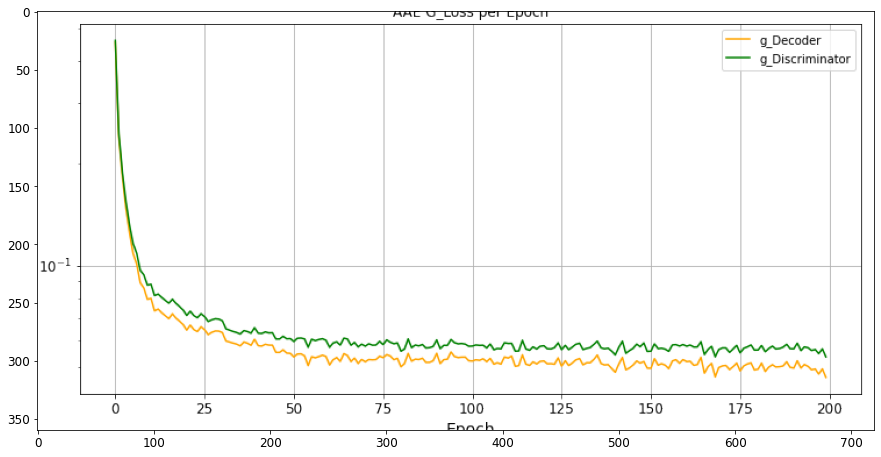

In [11]:
from PIL import Image

#Discriminator Loss
Dloss = Image.open('AAE/Losses/D_loss_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("D_loss",figsize=[15,10])
plt.imshow(Dloss)
#Encoder Loss
Gloss = Image.open('AAE/Losses/G_loss_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("G_loss",figsize=[15,10])
plt.imshow(Gloss)


## predict from the decoder

In [12]:
#encoder = tf.keras.models.load_model('./AAE/Models/encoder_v'+str(3)+'_'+str(500), compile=False)
#decoder = tf.keras.models.load_model('./AAE/Models/decoder_v'+str(3)+'_'+str(500), compile=False)
#discriminator = tf.keras.models.load_model('./AAE/Models/discriminator_v'+str(3)+'_'+str(1000), compile=False)


#moons=2
#enc_dis = tf.keras.models.load_model('content/'+notebookName[:-6]+str(epochs)+'.h5', compile=False).layers  

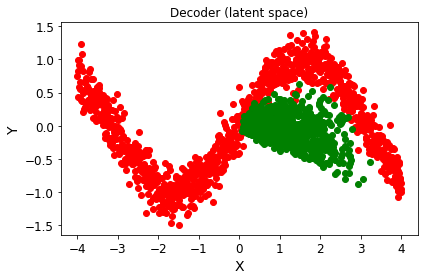

In [13]:
latent_values = tf.random.normal([1000, 6])
predicted_values = decoder(latent_values)

predicted_values2 = decoder(encoder(X_train_scaled))
predicted_values3 = encoder(X_train_scaled)
        

predicted_values = scaler.inverse_transform(predicted_values)
predicted_values2 = scaler.inverse_transform(predicted_values2)
predicted_values4 = scaler.inverse_transform(X_train_scaled)

            
fig, axes = plt.subplots()
#plt.scatter(predicted_values[:,0],predicted_values[:,1],c='green') #decoder(latent space)
plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='r')#X_trained_scaled
plt.scatter(predicted_values[:,0],predicted_values[:,1],c='green') #decoder(latent space)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Decoder (latent space)')
    
plt.tight_layout()
plt.savefig('AAE/Result/sin_v_'+str(3)+'_epochs_'+str(500)+'.png')
plt.show()

save countour line


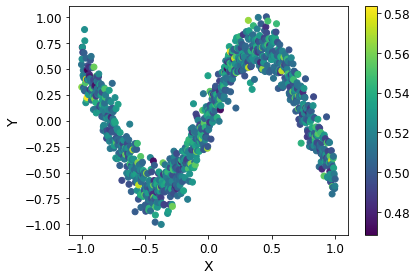

In [14]:
#latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)
        
#predict the labels of the data values on the basis of the trained model.
#predicted_values = generator.predict(latent_values)

#predicted_values[:,:]=(predicted_values[:,:])
#predicted_values2 = scaler.inverse_transform(predicted_values)


bottleneck = encoder(X_train_scaled)
     

disc_output = discriminator(bottleneck)
#disc_output = disc_output.numpy().reshape(x_num,y_num).T

x = X_train_scaled[:,0]
y = X_train_scaled[:,1]
z = disc_output
        
plt.scatter(x, y, c=z)
plt.ylabel('Y')
plt.xlabel('X')
        
plt.colorbar()
plt.tight_layout()

plt.savefig('AAE/Result/'+'moons_countour_points_v'+str(2)+'_epochs'+str(2000)+'.png')
print("save countour line")
plt.show()



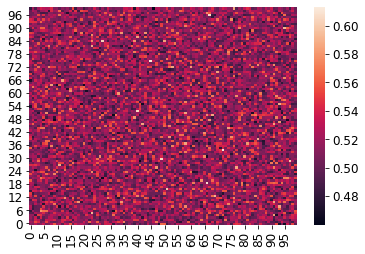

In [15]:
x_num = 100
y_num = 100
        
x = np.linspace(start=-1, stop=1, num=x_num)
y = np.linspace(start=-1, stop=1, num=y_num)

xy = np.zeros((x_num*y_num, 2))
for i in range(x_num):
    for j in range(y_num):
        xy[i*y_num+j][0] = x[i]
        xy[i*y_num+j][1] = y[j]
                
bottleneck = encoder(xy)
                
disc_output = discriminator(bottleneck)
disc_output = disc_output.numpy().reshape(x_num,y_num).T
        
fig, ax = plt.subplots()
sns.heatmap(disc_output, ax=ax)
ax.invert_yaxis()
       
plt.savefig('AAE/Result/Heatmap/'+'heatmap_sin_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.show()

In [16]:
epochs = epochs

### Applying the prediction function

In [17]:
i = i

In [18]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset, network

In [19]:
epochs = epochs

input_test : (900, 2)


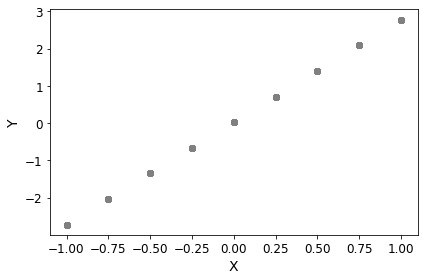

In [20]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [ ]:
X_generated = aae.predict(input_test, scaler)
print("X_generated :",X_generated.shape)

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

In [ ]:
if scenario in ("3d", "helix"):
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train) 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.savefig('AAE/Prediction/sin'+str(epochs)+'.png')
    